## Histgram

In [ ]:
# 读取文件并提取数值
values = []
with open("/workspace/RiceVL/data_procs/token_info_v2_emova_3000tk.txt", "r", encoding="utf-8") as f:
    for line in f:
        # 分割每行的标识符和数值，取冒号后的数值部分并转换为整数
        num = int(line.split(":")[-1].strip())
        values.append(num)


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 统计频次
count_result = Counter(values)
# 对x轴的数字进行排序，使折线图更连贯
unique_nums = sorted(count_result.keys())
frequencies = [count_result[num] for num in unique_nums]

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制折线图，添加标记点使数据更清晰
# plt.plot(unique_nums, frequencies, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
plt.plot(unique_nums, frequencies, 
         marker='.',       # 圆形标记点
         linestyle='-.',     # 不显示连接线
         color='b',        # 点的颜色
         markersize=3,    # 点的大小
         markerfacecolor='red',  # 点的填充色
         markeredgecolor='red') # 点的边缘色

# 添加标题和坐标轴标签
plt.title('Frequency of Each Number (Line Plot)', fontsize=15)
plt.xlabel('Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# # 为每个点添加数值标签
# for x, y in zip(unique_nums, frequencies):
#     plt.text(x, y + 0.1, str(y), ha='center', fontsize=10)

# 添加网格线，便于查看数值
plt.grid(alpha=0.3)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制直方图
# bins：直方图的分箱数量（可根据数据范围调整）
# edgecolor：设置柱形边缘颜色，区分不同分箱
n, bins, patches = plt.hist(values, bins=5, edgecolor='black', color='lightgreen')

# 添加标题和坐标轴标签
plt.title('Data Distribution Histogram', fontsize=15)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 在每个柱形上方标注频数
# for i in range(len(n)):
#     plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 0.1, 
#              f'{int(n[i])}', ha='center', fontsize=10)

# 添加网格线，便于查看
plt.grid(axis='y', alpha=0.3)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 绘制直方图
plt.figure(figsize=(12, 6))
# bins参数控制区间数量，可根据数据范围调整（如数值范围60-400，建议设30-50）
n, bins, patches = plt.hist(values, bins=40, edgecolor="black", alpha=0.7)

# 添加标题和坐标轴标签
plt.title('Distribution of Numeric Values')  
plt.xlabel('Value')  
plt.ylabel('Frequency')

# 显示网格线
plt.grid(axis="y", linestyle="--", alpha=0.5)

# 显示图像
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------- 1. 读取数据 ----------------------
values = []
with open("/workspace/RiceVL/data_procs/token_info_v2_emova_3000tk.txt", 'r', encoding='utf-8') as f:
    for line in f:
        try:
            num = int(line.split(':')[-1].strip())
            values.append(num)
        except:
            continue  # 避免异常数据影响，如有需可细化处理

if not values:
    raise ValueError("No valid numeric values found in tl.txt")

# ---------------------- 2. 计算关键点 ----------------------
min_val = min(values)
max_val = max(values)
# 等距划分三个中间点
a = min_val + (max_val - min_val) / 4
b = min_val + 2 * (max_val - min_val) / 4
c = min_val + 3 * (max_val - min_val) / 4

# 区间划分（转为元组方便后续处理）
bins = [min_val, a, b, c, max_val]
labels = [
    f"[{min_val:.2f}, {a:.2f})",
    f"[{a:.2f}, {b:.2f})",
    f"[{b:.2f}, {c:.2f})",
    f"[{c:.2f}, {max_val:.2f}]"
]

# 按区间分组
grouped_data = {label: [] for label in labels}
for num in values:
    for i in range(len(bins) - 1):
        if bins[i] <= num < bins[i + 1]:
            grouped_data[labels[i]].append(num)
            break
    # 处理刚好等于 max_val 的情况（放入最后一组）
    else:
        if num == max_val:
            grouped_data[labels[-1]].append(num)

# ---------------------- 3. 绘制每个区间的直方图 ----------------------
plt.rcdefaults()  # 重置为默认配置，避免字体等问题
fig, axes = plt.subplots(nrows=len(labels), ncols=1, figsize=(8, 5 * len(labels)))

for i, (label, data) in enumerate(grouped_data.items()):
    ax = axes[i] if len(labels) > 1 else axes
    # 绘制直方图
    ax.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    # 设置标题和标签
    ax.set_title(f"Histogram for {label} (Count: {len(data)})")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    # 添加数据量文本
    ax.text(0.95, 0.95, f"Count: {len(data)}", 
            horizontalalignment='right', verticalalignment='top', 
            transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 额外打印各区间数据量汇总
print("Interval Data Count Summary:")
for label, data in grouped_data.items():
    print(f"{label}: {len(data)}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_interval_histograms(file_path, split_points):
    """
    读取文件中的数值，按 [min, a), [a, b), [b, c), [c, max] 划分区间，绘制每个区间直方图并统计数据量
    :param file_path: 包含数值的文件路径，每行格式建议为 "xxx: 数值"
    :param split_points: 分割关键点列表，如 [a, b, c]，需满足 a < b < c
    """
    # ---------------------- 1. 读取并提取数值 ----------------------
    values = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                # 假设每行是类似 "xxx: 数值" 格式，提取最后面的数值部分并转成整数
                num = int(line.strip().split(':')[-1].strip())
                values.append(num)
            except (IndexError, ValueError):
                # 遇到格式异常的行，跳过处理
                continue
    if not values:
        raise ValueError("文件中未提取到有效数值，请检查文件内容格式")

    # ---------------------- 2. 确定区间边界 ----------------------
    min_val = min(values)
    max_val = max(values)
    # 结合传入的分割点，构建完整区间边界
    bins = [min_val] + split_points + [max_val]
    # 构建区间标签，方便识别
    interval_labels = [
        f"[{min_val}, {split_points[0]})",
        f"[{split_points[0]}, {split_points[1]})",
        f"[{split_points[1]}, {split_points[2]})",
        f"[{split_points[2]}, {max_val}]"
    ]

    # ---------------------- 3. 按区间分组数据 ----------------------
    grouped_data = {label: [] for label in interval_labels}
    for num in values:
        for i in range(len(bins) - 1):
            lower_bound = bins[i]
            upper_bound = bins[i + 1]
            # 处理左闭右开区间，最后一个区间是左闭右闭
            if i < len(bins) - 2 and lower_bound <= num < upper_bound:
                grouped_data[interval_labels[i]].append(num)
                break
            elif i == len(bins) - 2 and lower_bound <= num <= upper_bound:
                grouped_data[interval_labels[i]].append(num)
                break

    # ---------------------- 4. 绘制每个区间的直方图 ----------------------
    plt.rcdefaults()  # 重置 matplotlib 配置，避免字体等潜在问题
    fig, axes = plt.subplots(nrows=len(interval_labels), ncols=1, figsize=(8, 5 * len(interval_labels)))
    # 处理单轴和多轴情况，让代码更鲁棒
    axes = np.array(axes).reshape(-1)

    for i, (label, data) in enumerate(grouped_data.items()):
        ax = axes[i]
        # 绘制直方图，用 auto 自动适配 bins
        ax.hist(data, bins='auto', edgecolor='black', alpha=0.7)
        # 设置标题，带上该区间的数据量
        ax.set_title(f"Histogram of {label} (Data Count: {len(data)})")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        # 在图中添加数据量文本标注，放在右上角，带半透明背景
        ax.text(
            0.95, 0.95, 
            f"Count: {len(data)}", 
            horizontalalignment='right', 
            verticalalignment='top', 
            transform=ax.transAxes, 
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8)
        )

    plt.tight_layout()
    plt.show()

    # ---------------------- 5. 打印区间数据量汇总 ----------------------
    print("各区间数据量统计：")
    for label, data_list in grouped_data.items():
        print(f"{label}: {len(data_list)} 条")

In [ ]:
file_name = "/workspace/RiceVL/data_procs/token_info_v2_emova_3000tk.txt"
split_points = [1024, 2048, 4096]  # 你可以根据实际需求调整这三个分割点
try:
    plot_interval_histograms(file_name, split_points)
except Exception as e:
    print(f"执行过程中出现错误：{e}")

## VQA 5500k数据集

In [1]:
# 读取文件并提取数值
values = []
with open("/workspace/data4packing/RiceVL/data_procs/token_info_v2_vqa_pretrain_5M_8k.txt", "r", encoding="utf-8") as f:
    for line in f:
        # 分割每行的标识符和数值，取冒号后的数值部分并转换为整数
        num = int(line.split(":")[-1].strip())
        values.append(num)

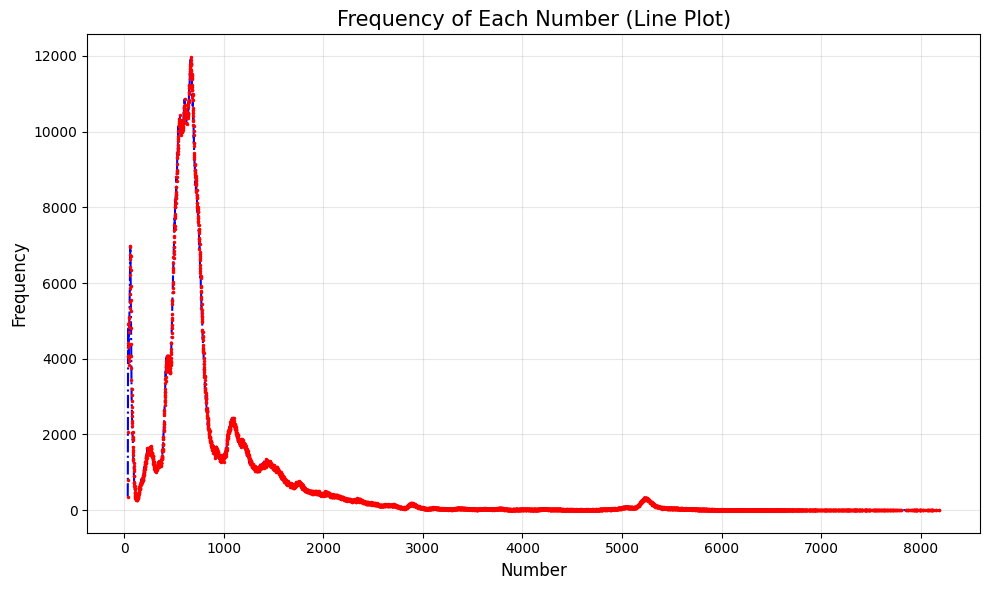

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# 统计频次
count_result = Counter(values)
# 对x轴的数字进行排序，使折线图更连贯
unique_nums = sorted(count_result.keys())
frequencies = [count_result[num] for num in unique_nums]

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制折线图，添加标记点使数据更清晰
# plt.plot(unique_nums, frequencies, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
plt.plot(unique_nums, frequencies, 
         marker='.',       # 圆形标记点
         linestyle='-.',     # 不显示连接线
         color='b',        # 点的颜色
         markersize=3,    # 点的大小
         markerfacecolor='red',  # 点的填充色
         markeredgecolor='red') # 点的边缘色

# 添加标题和坐标轴标签
plt.title('Frequency of Each Number (Line Plot)', fontsize=15)
plt.xlabel('Number', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# # 为每个点添加数值标签
# for x, y in zip(unique_nums, frequencies):
#     plt.text(x, y + 0.1, str(y), ha='center', fontsize=10)

# 添加网格线，便于查看数值
plt.grid(alpha=0.3)

# 调整布局
plt.tight_layout()

# 显示图像

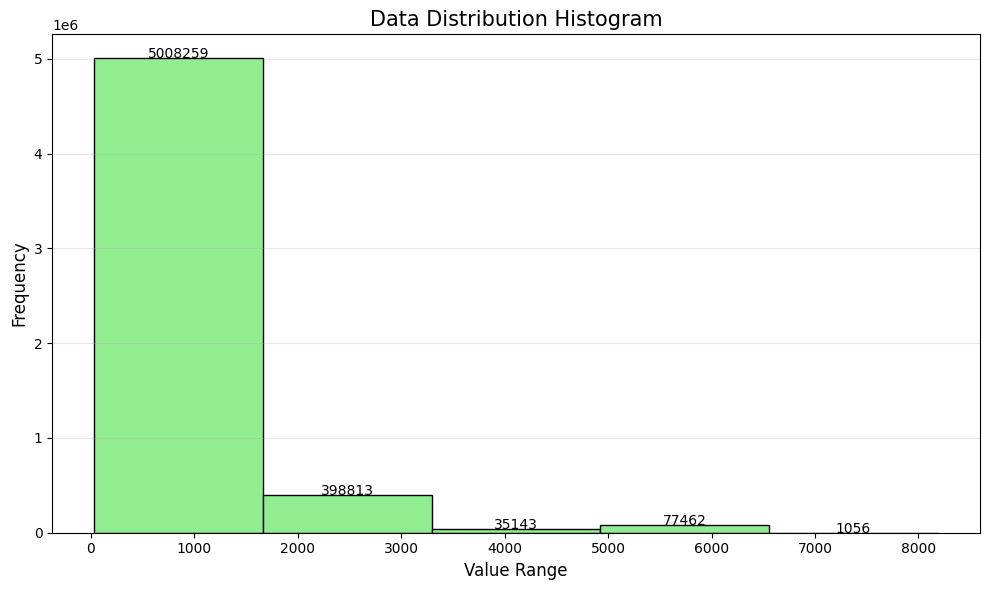

In [3]:
import matplotlib.pyplot as plt

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制直方图
# bins：直方图的分箱数量（可根据数据范围调整）
# edgecolor：设置柱形边缘颜色，区分不同分箱
n, bins, patches = plt.hist(values, bins=5, edgecolor='black', color='lightgreen')

# 添加标题和坐标轴标签
plt.title('Data Distribution Histogram', fontsize=15)
plt.xlabel('Value Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 在每个柱形上方标注频数
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 0.1, 
             f'{int(n[i])}', ha='center', fontsize=10)

# 添加网格线，便于查看
plt.grid(axis='y', alpha=0.3)

# 调整布局
plt.tight_layout()

# 显示图像
plt.show()

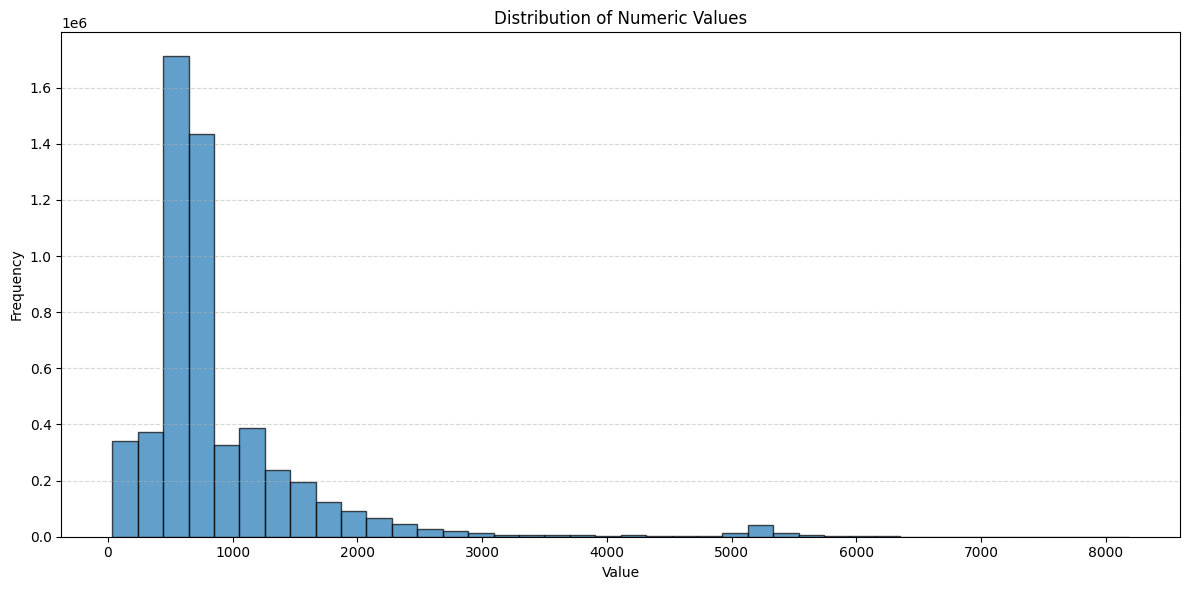

In [4]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 绘制直方图
plt.figure(figsize=(12, 6))
# bins参数控制区间数量，可根据数据范围调整（如数值范围60-400，建议设30-50）
n, bins, patches = plt.hist(values, bins=40, edgecolor="black", alpha=0.7)

# 添加标题和坐标轴标签
plt.title('Distribution of Numeric Values')  
plt.xlabel('Value')  
plt.ylabel('Frequency')

# 显示网格线
plt.grid(axis="y", linestyle="--", alpha=0.5)

# 显示图像
plt.tight_layout()
plt.show()

In [ ]:
sum(frequencies)

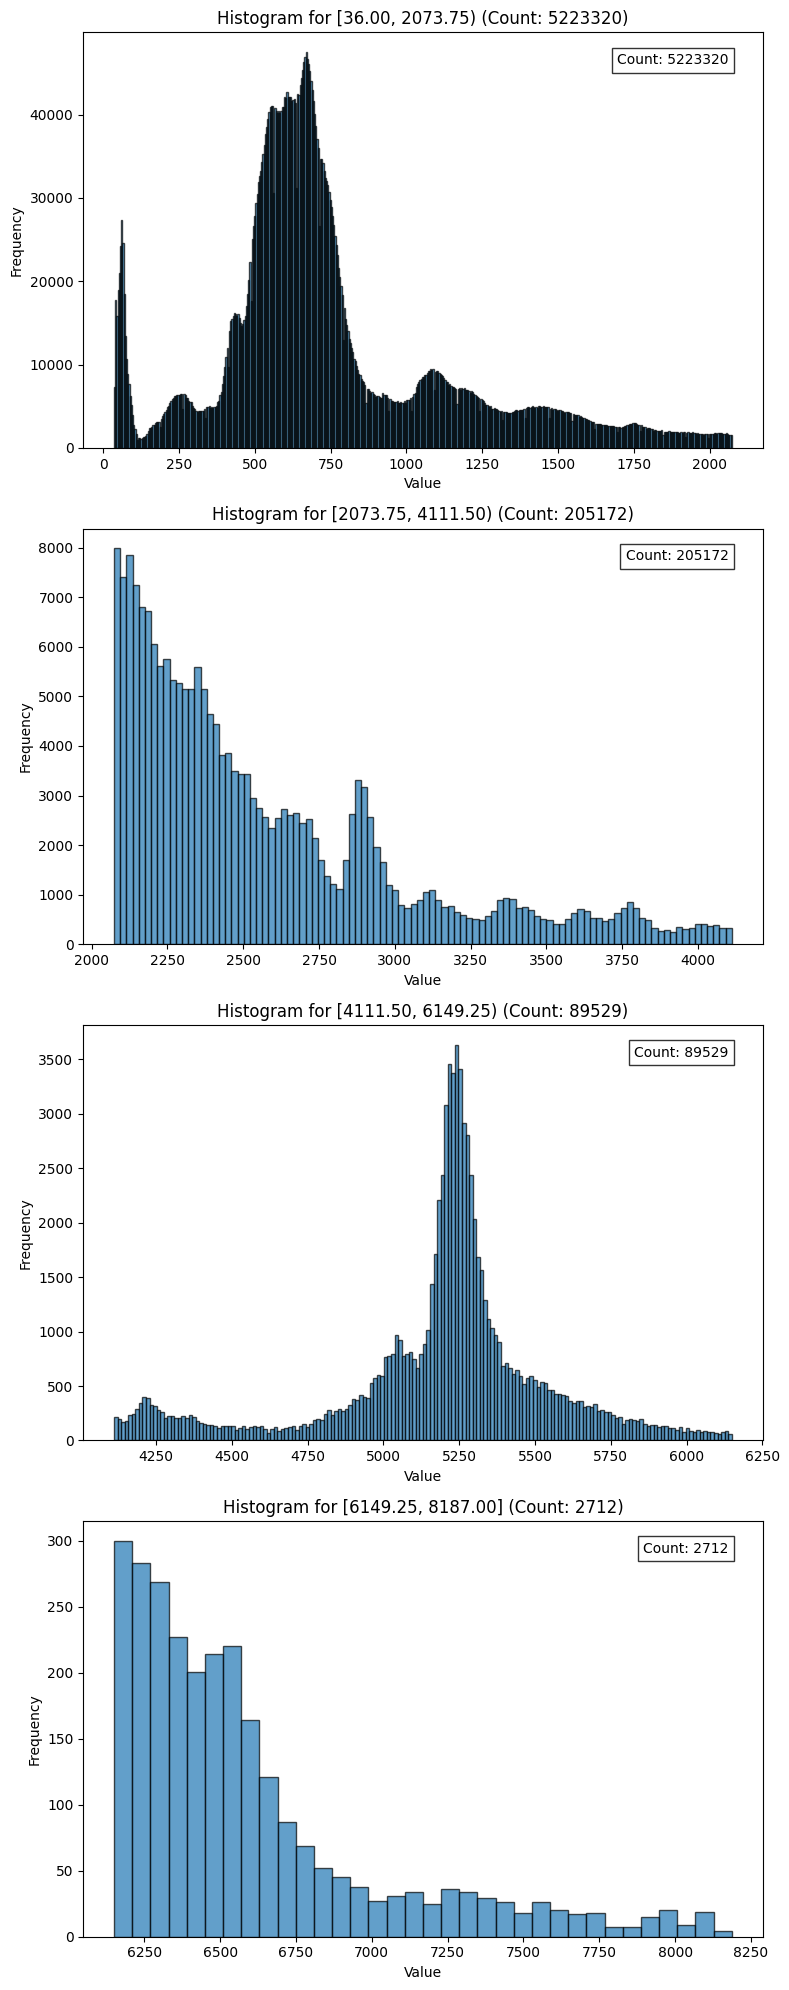

Interval Data Count Summary:
[36.00, 2073.75): 5223320
[2073.75, 4111.50): 205172
[4111.50, 6149.25): 89529
[6149.25, 8187.00]: 2712


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------- 1. 读取数据 ----------------------
values = []
with open("/workspace/data4packing/RiceVL/data_procs/token_info_v2_vqa_pretrain_5M_8k.txt", 'r', encoding='utf-8') as f:
    for line in f:
        try:
            num = int(line.split(':')[-1].strip())
            values.append(num)
        except:
            continue  # 避免异常数据影响，如有需可细化处理

if not values:
    raise ValueError("No valid numeric values found in tl.txt")

# ---------------------- 2. 计算关键点 ----------------------
min_val = min(values)
max_val = max(values)
# 等距划分三个中间点
a = min_val + (max_val - min_val) / 4
b = min_val + 2 * (max_val - min_val) / 4
c = min_val + 3 * (max_val - min_val) / 4

# 区间划分（转为元组方便后续处理）
bins = [min_val, a, b, c, max_val]
labels = [
    f"[{min_val:.2f}, {a:.2f})",
    f"[{a:.2f}, {b:.2f})",
    f"[{b:.2f}, {c:.2f})",
    f"[{c:.2f}, {max_val:.2f}]"
]

# 按区间分组
grouped_data = {label: [] for label in labels}
for num in values:
    for i in range(len(bins) - 1):
        if bins[i] <= num < bins[i + 1]:
            grouped_data[labels[i]].append(num)
            break
    # 处理刚好等于 max_val 的情况（放入最后一组）
    else:
        if num == max_val:
            grouped_data[labels[-1]].append(num)

# ---------------------- 3. 绘制每个区间的直方图 ----------------------
plt.rcdefaults()  # 重置为默认配置，避免字体等问题
fig, axes = plt.subplots(nrows=len(labels), ncols=1, figsize=(8, 5 * len(labels)))

for i, (label, data) in enumerate(grouped_data.items()):
    ax = axes[i] if len(labels) > 1 else axes
    # 绘制直方图
    ax.hist(data, bins='auto', edgecolor='black', alpha=0.7)
    # 设置标题和标签
    ax.set_title(f"Histogram for {label} (Count: {len(data)})")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    # 添加数据量文本
    ax.text(0.95, 0.95, f"Count: {len(data)}", 
            horizontalalignment='right', verticalalignment='top', 
            transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 额外打印各区间数据量汇总
print("Interval Data Count Summary:")
for label, data in grouped_data.items():
    print(f"{label}: {len(data)}")

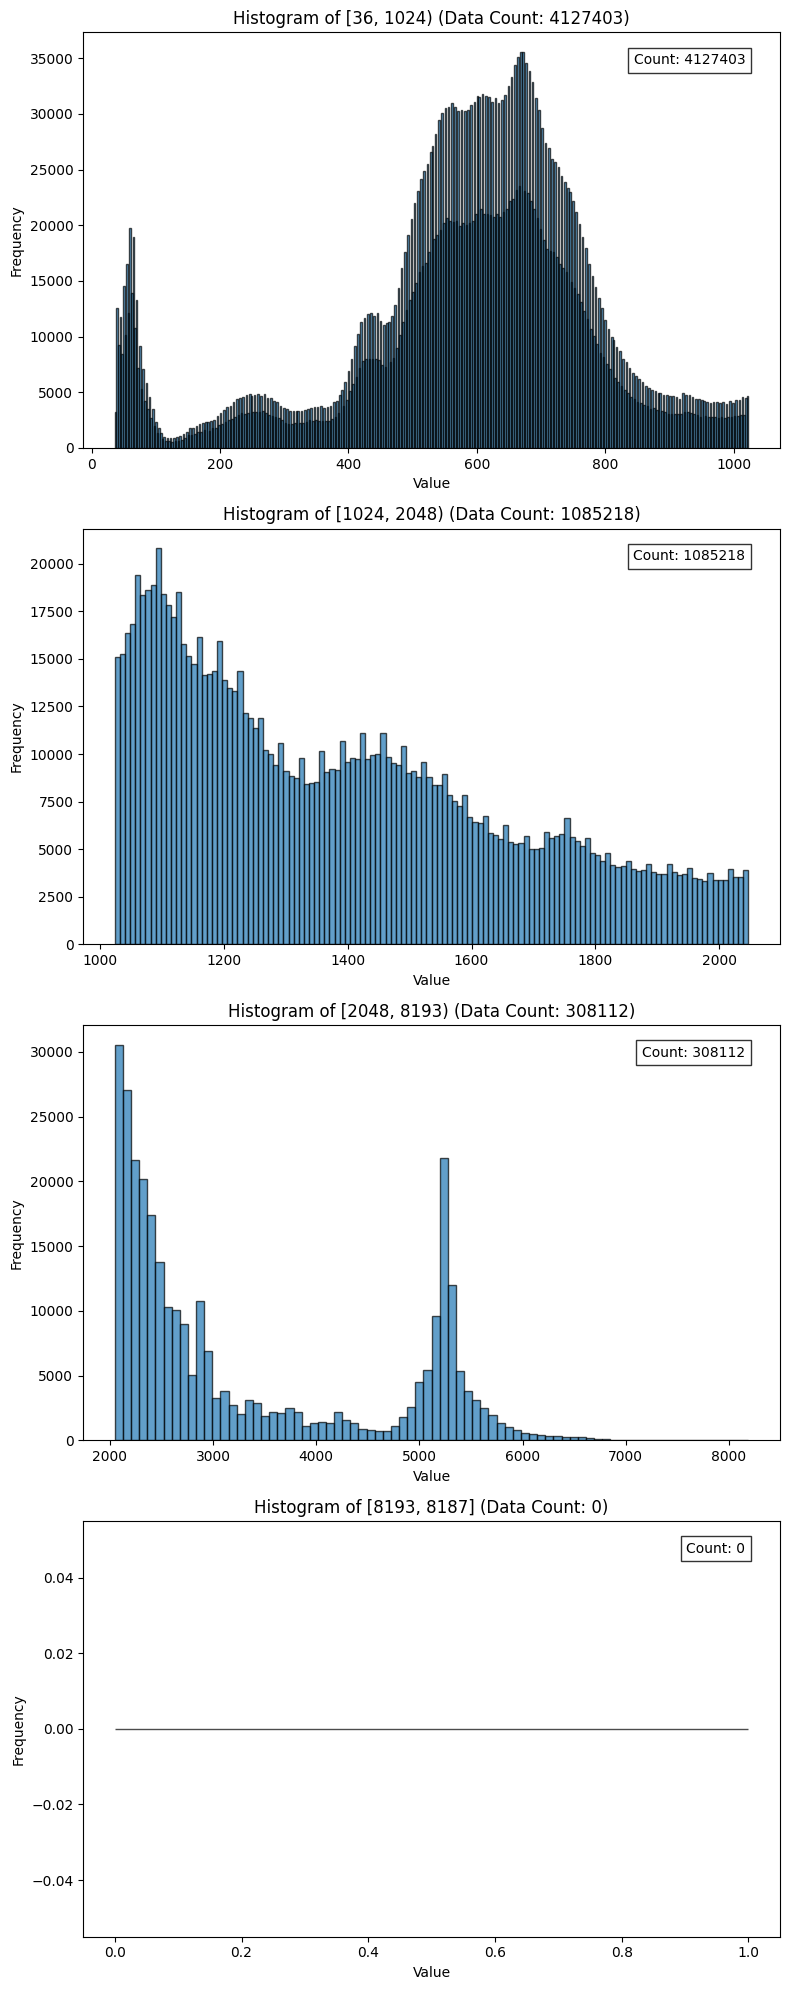

各区间数据量统计：
[36, 1024): 4127403 条
[1024, 2048): 1085218 条
[2048, 8193): 308112 条
[8193, 8187]: 0 条


In [7]:
import matplotlib.pyplot as plt
import numpy as np


def plot_interval_histograms(file_path, split_points):
    """
    读取文件中的数值，按 [min, a), [a, b), [b, c), [c, max] 划分区间，绘制每个区间直方图并统计数据量
    :param file_path: 包含数值的文件路径，每行格式建议为 "xxx: 数值"
    :param split_points: 分割关键点列表，如 [a, b, c]，需满足 a < b < c
    """
    # ---------------------- 1. 读取并提取数值 ----------------------
    values = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                # 假设每行是类似 "xxx: 数值" 格式，提取最后面的数值部分并转成整数
                num = int(line.strip().split(':')[-1].strip())
                values.append(num)
            except (IndexError, ValueError):
                # 遇到格式异常的行，跳过处理
                continue
    if not values:
        raise ValueError("文件中未提取到有效数值，请检查文件内容格式")

    # ---------------------- 2. 确定区间边界 ----------------------
    min_val = min(values)
    max_val = max(values)
    # 结合传入的分割点，构建完整区间边界
    bins = [min_val] + split_points + [max_val]
    # 构建区间标签，方便识别
    interval_labels = [
        f"[{min_val}, {split_points[0]})",
        f"[{split_points[0]}, {split_points[1]})",
        f"[{split_points[1]}, {split_points[2]})",
        f"[{split_points[2]}, {max_val}]"
    ]

    # ---------------------- 3. 按区间分组数据 ----------------------
    grouped_data = {label: [] for label in interval_labels}
    for num in values:
        for i in range(len(bins) - 1):
            lower_bound = bins[i]
            upper_bound = bins[i + 1]
            # 处理左闭右开区间，最后一个区间是左闭右闭
            if i < len(bins) - 2 and lower_bound <= num < upper_bound:
                grouped_data[interval_labels[i]].append(num)
                break
            elif i == len(bins) - 2 and lower_bound <= num <= upper_bound:
                grouped_data[interval_labels[i]].append(num)
                break

    # ---------------------- 4. 绘制每个区间的直方图 ----------------------
    plt.rcdefaults()  # 重置 matplotlib 配置，避免字体等潜在问题
    fig, axes = plt.subplots(nrows=len(interval_labels), ncols=1, figsize=(8, 5 * len(interval_labels)))
    # 处理单轴和多轴情况，让代码更鲁棒
    axes = np.array(axes).reshape(-1)

    for i, (label, data) in enumerate(grouped_data.items()):
        ax = axes[i]
        # 绘制直方图，用 auto 自动适配 bins
        ax.hist(data, bins='auto', edgecolor='black', alpha=0.7)
        # 设置标题，带上该区间的数据量
        ax.set_title(f"Histogram of {label} (Data Count: {len(data)})")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        # 在图中添加数据量文本标注，放在右上角，带半透明背景
        ax.text(
            0.95, 0.95, 
            f"Count: {len(data)}", 
            horizontalalignment='right', 
            verticalalignment='top', 
            transform=ax.transAxes, 
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8)
        )

    plt.tight_layout()
    plt.show()

    # ---------------------- 5. 打印区间数据量汇总 ----------------------
    print("各区间数据量统计：")
    for label, data_list in grouped_data.items():
        print(f"{label}: {len(data_list)} 条")


file_name = "/workspace/data4packing/RiceVL/data_procs/token_info_v2_vqa_pretrain_5M_8k.txt"
split_points = [1024, 2048, 8193]  # 你可以根据实际需求调整这三个分割点
try:
    plot_interval_histograms(file_name, split_points)
except Exception as e:
    print(f"执行过程中出现错误：{e}")

In [3]:
4127332+1085218+285155

5497705